In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.layers import Conv1D, TimeDistributed, Flatten, SpatialDropout1D, GlobalAveragePooling1D, SimpleRNN, MaxPooling1D, GlobalMaxPooling1D, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_score, classification_report
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from numpy import genfromtxt

/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/niall/opt/anaconda3/envs/DCUML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/niall/opt/anaconda3/envs/DCUML

In [4]:
from numpy import genfromtxt

input_file = '/Users/niall/Documents/Cypress_Code/Data/Flip_bits/flip_bits_dataset_final.csv'

my_data_flipped = genfromtxt(input_file, delimiter=',')

In [5]:
new_data = np.delete(my_data_flipped, (0), axis=0)

In [6]:
X2 = np.delete(new_data, (0,32), axis=1)

In [7]:
Y2 = new_data[:,32]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [9]:
X_train = np.array(X_train).reshape((np.shape(X_train)[0], 1, np.shape(X_train)[1]))
X_test = np.array(X_test).reshape((np.shape(X_test)[0], 1, np.shape(X_test)[1]))

## 1. Two Layer LSTM

In [59]:
num_neurons = 31
num_features = 31


model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

print("inputs: " , model.input_shape)
print("outputs: ", model.output_shape)
print("actual inputs: ", np.shape(X_train))
print("actual outputs: ", np.shape(y_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 31)             7812      
_________________________________________________________________
lstm_12 (LSTM)               (None, 31)                7812      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 32        
Total params: 15,656
Trainable params: 15,656
Non-trainable params: 0
_________________________________________________________________
inputs:  (None, 1, 31)
outputs:  (None, 1)
actual inputs:  (450000, 1, 31)
actual outputs:  (450000,)


In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
print('Training LSTM...')

batch_size = 5

history_two_layer = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(X_test, y_test))

Training LSTM...
Train on 450000 samples, validate on 150000 samples
Epoch 1/5
450000/450000 [==============================] - 670s 1ms/sample - loss: 0.0389 - acc: 0.9864 - val_loss: 0.0392 - val_acc: 0.9856
Epoch 2/5
450000/450000 [==============================] - 625s 1ms/sample - loss: 0.0348 - acc: 0.9876 - val_loss: 0.0349 - val_acc: 0.9875
Epoch 3/5
450000/450000 [==============================] - 569s 1ms/sample - loss: 0.0337 - acc: 0.9878 - val_loss: 0.0351 - val_acc: 0.9875
Epoch 4/5
450000/450000 [==============================] - 572s 1ms/sample - loss: 0.0331 - acc: 0.9881 - val_loss: 0.0344 - val_acc: 0.9875
Epoch 5/5
450000/450000 [==============================] - 574s 1ms/sample - loss: 0.0327 - acc: 0.9881 - val_loss: 0.0344 - val_acc: 0.9880


150000/150000 [==============================] - 8s 54us/sample - loss: 0.0344 - acc: 0.9880
Test Loss:  0.03440156640297268
Test Accuracy 0.9879533
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


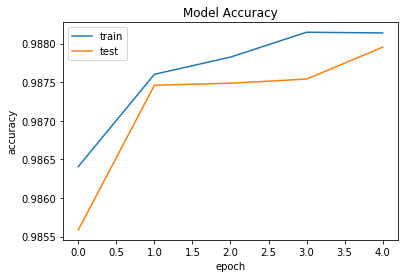

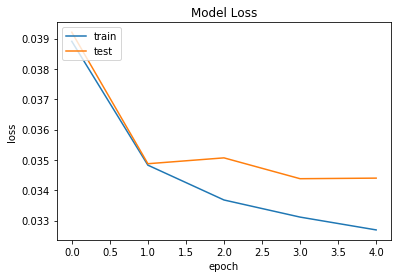

In [63]:
score = model.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_two_layer.history.keys())
# summarize history for accuracy
plt.plot(history_two_layer.history['acc'])
plt.plot(history_two_layer.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_two_layer.history['loss'])
plt.plot(history_two_layer.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# Let's save the model to disc
json = model.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_two_layer.json", "w") as file:
    file.write(json)
model.save_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_two_layer.h5")
print("Saved model to disc")

Saved model to disc


In [8]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_two_layer.json', 'r')
json = json_file.read()
json_file.close()
model_avg_from_disc = model_from_json(json)
model_avg_from_disc.load_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_two_layer.h5")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_two_layer.json'

# Predictions on test data

In [66]:
y_preds_two_layer = model_avg_from_disc.predict(X_test, batch_size=1)

## REF REF Label

In [67]:
pred_df = pd.DataFrame(y_preds_two_layer, columns =['Y_pred']) 
pred_df['Label'] = y_test

In [68]:
pred_df.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/Flip_bits/y_preds_two_layer.csv', index = False)

In [108]:
y_pred_ref_ref = pred_df[pred_df['Label'] == 1]
y_pred_ref_ref.head()

,Y_pred,Label
0,0.999768,1.0
1,0.999392,1.0
2,0.999965,1.0
3,0.999946,1.0
6,0.997597,1.0


In [49]:
y_pred_non_ref = pred_df[pred_df['Label'] == 0]
y_pred_non_ref.head()

,Y_pred,Label
0,0.000107,0.0
1,0.020756,0.0
2,0.000096,0.0
3,0.000100,0.0
4,0.000086,0.0


### All Predictions

Text(0.5, 1.0, 'All y_preds flip_bits')

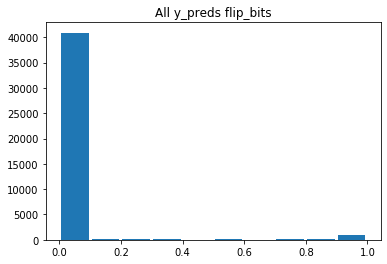

In [50]:
plt.hist(y_pred, rwidth=0.9)
plt.title('All y_preds flip_bits')

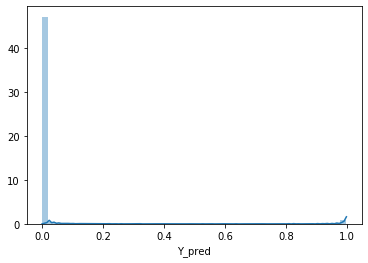

In [58]:
sns.distplot(pred_df['Y_pred'], kde=True)

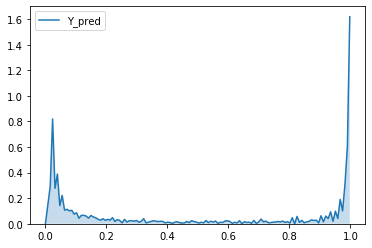

In [51]:
sns.kdeplot(pred_df['Y_pred'],shade=True)

### Ref Ref Predictions

Text(0.5, 1.0, 'Ref_Ref y_preds flip bits')

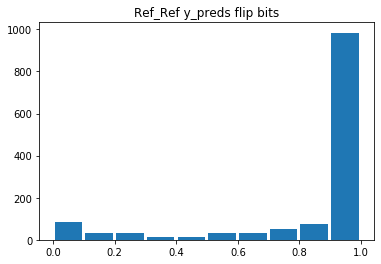

In [52]:
plt.hist(y_pred_ref_ref['Y_pred'], rwidth=0.9)
plt.title('Ref_Ref y_preds flip bits')

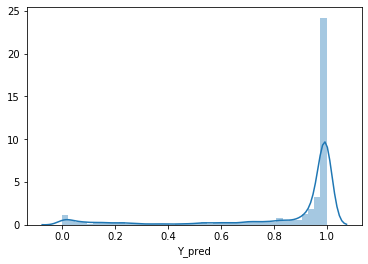

In [60]:
sns.distplot(y_pred_ref_ref['Y_pred'], kde=True)

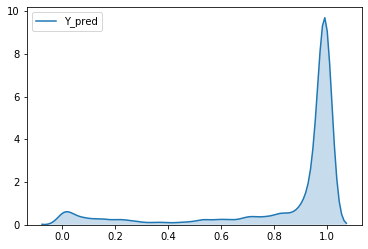

In [53]:
sns.kdeplot(y_pred_ref_ref['Y_pred'],shade=True)

### Non Ref Ref Predictions

Text(0.5, 1.0, 'Not Ref_Ref y_preds flip_bits')

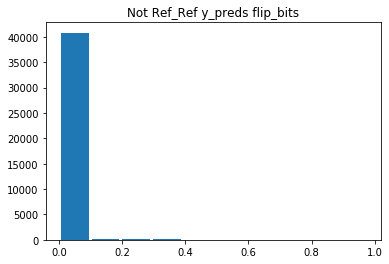

In [54]:
plt.hist(y_pred_non_ref['Y_pred'], rwidth=0.9)
plt.title('Not Ref_Ref y_preds flip_bits')

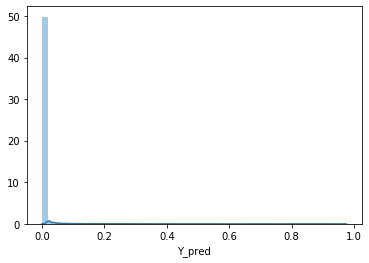

In [61]:
sns.distplot(y_pred_non_ref['Y_pred'], kde=True)

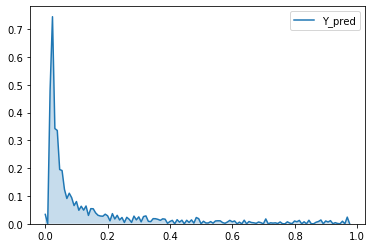

In [55]:
sns.kdeplot(y_pred_non_ref['Y_pred'],shade=True)

### KDE of both classifications

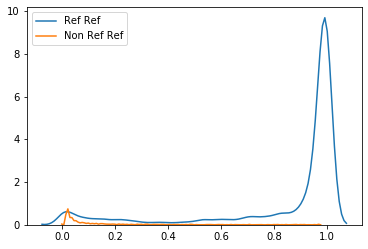

In [56]:
ax = sns.kdeplot(y_pred_ref_ref['Y_pred'], label='Ref Ref')
sns.kdeplot(y_pred_non_ref['Y_pred'],label='Non Ref Ref', ax=ax)

# 2. LSTM with GlobalAveragePool

In [13]:
num_neurons = 31
num_features = 31

model_lstm_avg = Sequential()
model_lstm_avg.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model_lstm_avg.add(SpatialDropout1D(0.2))
model_lstm_avg.add(LSTM(num_neurons, input_shape=(1, num_features), dropout=0.2, recurrent_dropout=0.2, return_sequences=True),)
model_lstm_avg.add(GlobalAveragePooling1D())
model_lstm_avg.add(Dense(16, activation='sigmoid'))
model_lstm_avg.add(Dropout(0.2))
model_lstm_avg.add(Dense(1, activation='sigmoid'))

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm_avg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_avg.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 1, 31)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 31)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
___________________________

In [21]:
print('Training LSTM...')

batch_size = 5

history_lstm_avg = model_lstm_avg.fit(X_train, y_train, 
                                      batch_size=batch_size,
                                      epochs=5,
                                      validation_data=(X_test, y_test), 
                                      callbacks=[rlrp] ,verbose=1)


Training LSTM...
Train on 450000 samples, validate on 150000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
450000/450000 [==============================] - 601s 1ms/sample - loss: 0.0457 - acc: 0.9848 - val_loss: 0.0367 - val_acc: 0.9864
Epoch 2/5
450000/450000 [==============================] - 534s 1ms/sample - loss: 0.0390 - acc: 0.9869 - val_loss: 0.0357 - val_acc: 0.9874
Epoch 3/5
450000/450000 [==============================] - 467s 1ms/sample - loss: 0.0381 - acc: 0.9872 - val_loss: 0.0375 - val_acc: 0.9871
Epoch 4/5
450000/450000 [==============================] - 438s 974us/sample - loss: 0.0376 - acc: 0.9875 - val_loss: 0.0402 - val_acc: 0.9873
Epoch 5/5
450000/450000 [==============================] - 442s 983us/sample - loss: 0.0356 - acc: 0.9880 - val_loss: 0.0345 - val_acc: 0.9881


150000/150000 [==============================] - 7s 45us/sample - loss: 0.0345 - acc: 0.9881
Test Loss:  0.0344835894645052
Test Accuracy 0.98808
dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


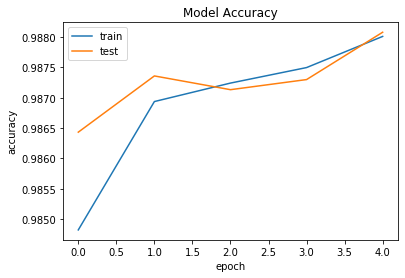

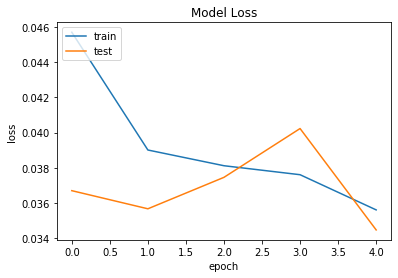

In [24]:
score = model_lstm_avg.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm_avg.history.keys())
# summarize history for accuracy
plt.plot(history_lstm_avg.history['acc'])
plt.plot(history_lstm_avg.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm_avg.history['loss'])
plt.plot(history_lstm_avg.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Let's save the model to disc
json = model_lstm_avg.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_avg.json", "w") as file:
    file.write(json)
model_lstm_avg.save_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_avg.h5")
print("Saved model to disc")

Saved model to disc


In [10]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/LSTM/Flip_bit_models/model_lstm_avg.json', 'r')
json = json_file.read()
json_file.close()
model_avg_from_disc = model_from_json(json)
model_avg_from_disc.load_weights("/Users/niall/Documents/Cypress_Code/Models/LSTM/Flip_bit_models/model_lstm_avg.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
y_preds_avg = model_avg_from_disc.predict(X_test, batch_size=1)

In [34]:
pred_avg = pd.DataFrame(y_preds_avg, columns =['Y_pred']) 
pred_avg['Label'] = y_test

In [35]:
pred_avg.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/Flip_bits/pred_avg.csv', index = False)

In [12]:
yhat = model_avg_from_disc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, yhat)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.233767, G-Mean=0.987


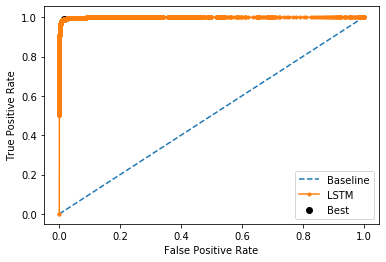

In [11]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='LSTM')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.savefig('/Users/niall/Documents/Cypress_Code/Plots/Matlab_flip_bits/LSTM_ROC.png')
plt.show()


In [13]:
auc = roc_auc_score(y_test, yhat)
print('ROC AUC=%.3f' % (auc))

ROC AUC=0.999


In [11]:
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    
yhat_new = model_avg_from_disc.predict_classes(X_test)
metrics(yhat_new, y_test)

F1-score:  0.9821006687222199
Precision:  0.9806281361828032
Recall:  0.9835776302861382
Acuracy:  0.98808
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    100129
           1       0.98      0.98      0.98     49871

    accuracy                           0.99    150000
   macro avg       0.99      0.99      0.99    150000
weighted avg       0.99      0.99      0.99    150000



## Predictions on test data

In [82]:
y_pred_deep = deep_model.predict(X_test, batch_size=1)

In [87]:
print(np.shape(y_pred_deep))

(42625, 1, 1)


In [89]:
y_pred_deep = np.array(y_pred_deep).reshape((np.shape(y_pred_deep)[0], np.shape(y_pred_deep)[1]))

In [90]:
print(np.shape(y_pred_deep))

(42625, 1)


In [91]:
print(y_pred_deep[:5])

[[0.02652266]
 [0.0504842 ]
 [0.02647969]
 [0.02644005]
 [0.02641368]]


In [92]:
pred_df_deep = pd.DataFrame(y_pred_deep, columns =['Y_pred']) 
pred_df_deep['Label'] = y_test

In [93]:
y_pred_ref_ref_deep = pred_df_deep[pred_df_deep['Label'] == 1]
y_pred_ref_ref_deep.head()

,Y_pred,Label
8,0.206324,1.0
73,0.190821,1.0
114,0.204339,1.0
167,0.104224,1.0
185,0.225726,1.0


In [94]:
y_pred_non_ref_deep = pred_df_deep[pred_df_deep['Label'] == 0]
y_pred_non_ref_deep.head()

,Y_pred,Label
0,0.026523,0.0
1,0.050484,0.0
2,0.026480,0.0
3,0.026440,0.0
4,0.026414,0.0


## All Predictions

Text(0.5, 1.0, 'All y_preds flip_bits')

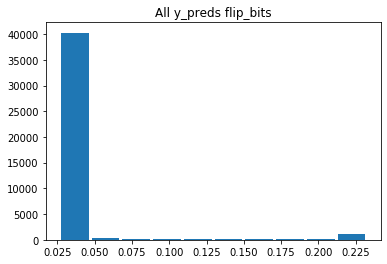

In [101]:
plt.hist(y_pred_deep, rwidth=0.9)
plt.title('All y_preds flip_bits')

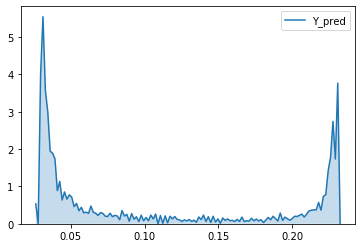

In [107]:
sns.kdeplot(pred_df_deep['Y_pred'],shade=True)

## Ref Ref Predictions 

Text(0.5, 1.0, 'Ref_Ref y_preds flip bits')

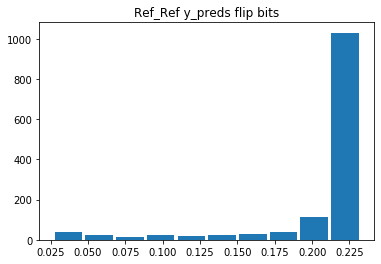

In [102]:
plt.hist(y_pred_ref_ref_deep['Y_pred'], rwidth=0.9)
plt.title('Ref_Ref y_preds flip bits')

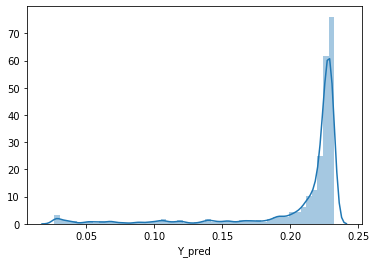

In [103]:
sns.distplot(y_pred_ref_ref_deep['Y_pred'], kde=True)

## Non Ref Ref Predictions

Text(0.5, 1.0, 'Non Ref_Ref y_preds flip bits')

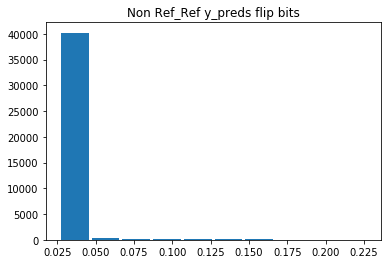

In [104]:
plt.hist(y_pred_non_ref_deep['Y_pred'], rwidth=0.9)
plt.title('Non Ref_Ref y_preds flip bits')

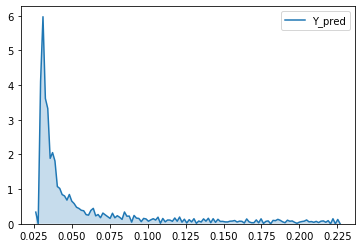

In [105]:
sns.kdeplot(y_pred_non_ref_deep['Y_pred'],shade=True)

## 3. LSTM with GlobalMaxPooling & SpatialDropout

In [38]:
num_neurons = 31
num_features = 31

model_lstm_max = Sequential()
model_lstm_max.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model_lstm_max.add(SpatialDropout1D(0.2))
model_lstm_max.add(LSTM(num_neurons, input_shape=(1, num_features), dropout=0.2, recurrent_dropout=0.2, return_sequences=True),)
model_lstm_max.add(GlobalMaxPooling1D())
model_lstm_max.add(Dense(16, activation='sigmoid'))
model_lstm_max.add(Dropout(0.2))
model_lstm_max.add(Dense(1, activation='sigmoid'))

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm_max.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_max.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 1, 31)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
global_max_pooling1d (Global (None, 31)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total para

In [39]:
print('Training LSTM...')

batch_size = 3

history_lstm_max = model_lstm_max.fit(X_train, y_train,
                              batch_size=batch_size, 
                              epochs=5, 
                              validation_data=(X_test, y_test),
                              callbacks=[rlrp] ,verbose=1)

Training LSTM...
Train on 450000 samples, validate on 150000 samples
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
450000/450000 [==============================] - 710s 2ms/sample - loss: 0.0452 - acc: 0.9851 - val_loss: 0.0387 - val_acc: 0.9866
Epoch 2/5
450000/450000 [==============================] - 710s 2ms/sample - loss: 0.0395 - acc: 0.9871 - val_loss: 0.0361 - val_acc: 0.9873
Epoch 3/5
450000/450000 [==============================] - 766s 2ms/sample - loss: 0.0392 - acc: 0.9872 - val_loss: 0.0355 - val_acc: 0.9876
Epoch 4/5
450000/450000 [==============================] - 763s 2ms/sample - loss: 0.0393 - acc: 0.9873 - val_loss: 0.0370 - val_acc: 0.9876
Epoch 5/5
450000/450000 [==============================] - 1065s 2ms/sample - loss: 0.0394 - acc: 0.9874 - val_loss: 0.0353 - val_acc: 0.9878


150000/150000 [==============================] - 8s 55us/sample - loss: 0.0353 - acc: 0.9878
Test Loss:  0.03526166637364775
Test Accuracy 0.98778
dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


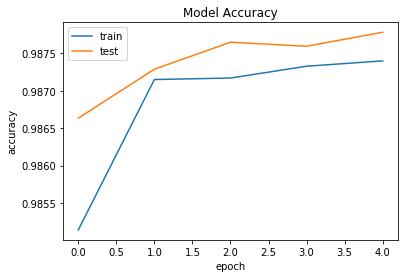

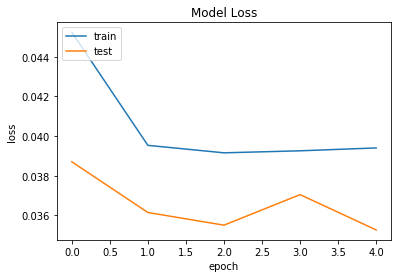

In [41]:
score = model_lstm_max.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm_max.history.keys())
# summarize history for accuracy
plt.plot(history_lstm_max.history['acc'])
plt.plot(history_lstm_max.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm_max.history['loss'])
plt.plot(history_lstm_max.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# Let's save the model to disc
json = model_lstm_max.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_max.json", "w") as file:
    file.write(json)
model_lstm_max.save_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_max.h5")
print("Saved model to disc")

Saved model to disc


In [44]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_max.json', 'r')
json = json_file.read()
json_file.close()
model_lstm_max = model_from_json(json)
model_lstm_max.load_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_max.h5")

In [45]:
y_pred_lstm_max = model_lstm_max.predict(X_test, batch_size=1, verbose=1)

150000/150000 [==============================] - 199s 1ms/sample


In [46]:
pred = pd.DataFrame(y_pred_lstm_max, columns =['Y_pred']) 
pred['Label'] = y_test

In [47]:
pred.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/Flip_bits/model_lstm_max.csv', index = False)

# 4. Three Stack LSTM Spartial Dropout

In [48]:
num_neurons = 31
num_features = 31

model_lstm_stack = Sequential()
model_lstm_stack.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model_lstm_stack.add(SpatialDropout1D(0.2))
model_lstm_stack.add(LSTM(num_neurons, input_shape=(1, num_features), dropout=0.2, recurrent_dropout=0.2, return_sequences=True),)
model_lstm_stack.add(LSTM(num_neurons, input_shape=(1, num_features), dropout=0.2, recurrent_dropout=0.2, return_sequences=True),)
model_lstm_stack.add(GlobalMaxPooling1D())
model_lstm_stack.add(Dense(16, activation='sigmoid'))
model_lstm_stack.add(Dropout(0.2))
model_lstm_stack.add(Dense(1, activation='sigmoid'))

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm_stack.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_stack.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 1, 31)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 31)             7812      
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 31)             7812      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 31)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
__________

In [50]:
print('Training LSTM...')

batch_size = 3

history_lstm_stack = model_lstm_stack.fit(X_train, y_train,
                              batch_size=batch_size, 
                              epochs=2, 
                              validation_data=(X_test, y_test),
                              callbacks=[rlrp] ,verbose=1)

Training LSTM...
Train on 450000 samples, validate on 150000 samples
Epoch 1/2
450000/450000 [==============================] - 1403s 3ms/sample - loss: 0.0443 - acc: 0.9855 - val_loss: 0.0374 - val_acc: 0.9874
Epoch 2/2
450000/450000 [==============================] - 1438s 3ms/sample - loss: 0.0409 - acc: 0.9869 - val_loss: 0.0378 - val_acc: 0.9872


150000/150000 [==============================] - 9s 58us/sample - loss: 0.0378 - acc: 0.9872
Test Loss:  0.03783250959698577
Test Accuracy 0.9872
dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


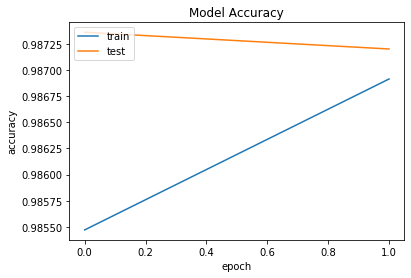

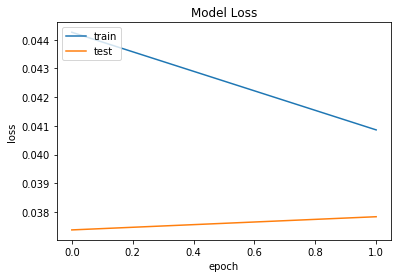

In [52]:
score = model_lstm_stack.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm_stack.history.keys())

# summarize history for accuracy
plt.plot(history_lstm_stack.history['acc'])
plt.plot(history_lstm_stack.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_lstm_stack.history['loss'])
plt.plot(history_lstm_stack.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# Let's save the model to disc
json = model_lstm_stack.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_stack.json", "w") as file:
    file.write(json)
model_lstm_stack.save_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_stack.h5")
print("Saved model to disc")

Saved model to disc


In [55]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_stack.json', 'r')
json = json_file.read()
json_file.close()
model_lstm_stack = model_from_json(json)
model_lstm_stack.load_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_stack.h5")

In [56]:
y_pred_lstm_stack = model_lstm_stack.predict(X_test, batch_size=1, verbose=1)

150000/150000 [==============================] - 357s 2ms/sample


In [57]:
pred = pd.DataFrame(y_pred_lstm_stack, columns =['Y_pred']) 
pred['Label'] = y_test

In [58]:
pred.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/Flip_bits/model_lstm_stack.csv', index = False)

# 5. LSTM Low Complexity 

In [69]:
num_neurons = 31
num_features = 31

model_lstm_low_comp = Sequential()
model_lstm_low_comp.add(LSTM(num_neurons, input_shape=(1, num_features), dropout=0.2, recurrent_dropout=0.2, return_sequences=True),)
model_lstm_low_comp.add(Dense(15, activation='sigmoid'))
model_lstm_low_comp.add(Dense(1, activation='sigmoid'))

rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_lstm_low_comp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_low_comp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 31)             7812      
_________________________________________________________________
dense_9 (Dense)              (None, 1, 15)             480       
_________________________________________________________________
dense_10 (Dense)             (None, 1, 1)              16        
Total params: 8,308
Trainable params: 8,308
Non-trainable params: 0
_________________________________________________________________


In [70]:
print('Training LSTM...')

batch_size = 3

history_lstm_low_comp = model_lstm_low_comp.fit(X_train, y_train,
                              batch_size=batch_size, 
                              epochs=5, 
                              validation_data=(X_test, y_test),
                              callbacks=[rlrp] ,verbose=1)

Training LSTM...
Train on 450000 samples, validate on 150000 samples
Epoch 1/5
450000/450000 [==============================] - 498s 1ms/sample - loss: 0.5872 - acc: 0.6983 - val_loss: 0.5857 - val_acc: 0.6997
Epoch 2/5
450000/450000 [==============================] - 635s 1ms/sample - loss: 0.5861 - acc: 0.6995 - val_loss: 0.5850 - val_acc: 0.7004
Epoch 3/5
450000/450000 [==============================] - 577s 1ms/sample - loss: 0.5859 - acc: 0.6999 - val_loss: 0.5852 - val_acc: 0.7004
Epoch 4/5
450000/450000 [==============================] - 675s 2ms/sample - loss: 0.5855 - acc: 0.7003 - val_loss: 0.5851 - val_acc: 0.7003
Epoch 5/5
450000/450000 [==============================] - 594s 1ms/sample - loss: 0.5855 - acc: 0.7000 - val_loss: 0.5855 - val_acc: 0.6996


150000/150000 [==============================] - 5s 32us/sample - loss: 0.6780 - acc: 0.5731
Test Loss:  0.6779864183108012
Test Accuracy 0.5730985
dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


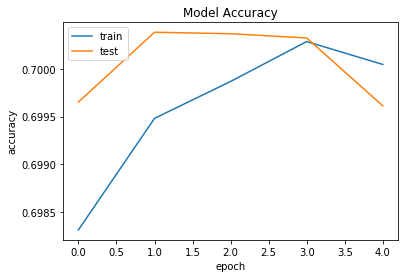

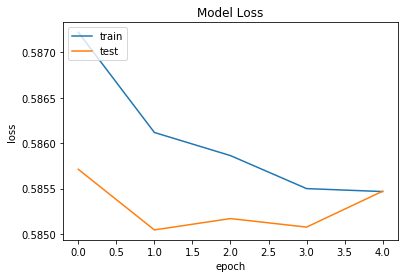

In [72]:
score = model_lstm_low_comp.evaluate(X_test, y_test)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_lstm_low_comp.history.keys())

# summarize history for accuracy
plt.plot(history_lstm_low_comp.history['acc'])
plt.plot(history_lstm_low_comp.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_lstm_low_comp.history['loss'])
plt.plot(history_lstm_low_comp.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
# Let's save the model to disc
json = model_lstm_low_comp.to_json()
with open("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_low_comp.json", "w") as file:
    file.write(json)
model_lstm_low_comp.save_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_low_comp.h5")
print("Saved model to disc")

Saved model to disc


In [76]:
# Load the model of interest
json_file = open('/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_low_comp.json', 'r')
json = json_file.read()
json_file.close()
model_lstm_low_comp = model_from_json(json)
model_lstm_low_comp.load_weights("/Users/niall/Documents/Cypress_Code/Models/Flip_bit_models/model_lstm_low_comp.h5")

In [77]:
y_pred_lstm_low_comp = model_lstm_low_comp.predict(X_test, batch_size=1, verbose=1)

150000/150000 [==============================] - 126s 840us/sample


In [80]:
y_pred_lstm_low_comp.shape

(150000, 1, 1)

In [84]:
output = [elem for twod in y_pred_lstm_low_comp for elem in twod] 

In [88]:
arr = np.array(output) 

In [90]:
pred = pd.DataFrame(arr, columns =['Y_pred']) 
pred['Label'] = y_test

In [92]:
pred.to_csv('/Users/niall/Documents/Cypress_Code/Predictions/Flip_bits/model_lstm_low_comp.csv', index = False)